In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [26]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [32]:
# Clean data
df_clean = df[(df['value'] >= df['value'].quantile(0.025))]
df_clean = df_clean[(df_clean['value'] <= df_clean['value'].quantile(0.975))]

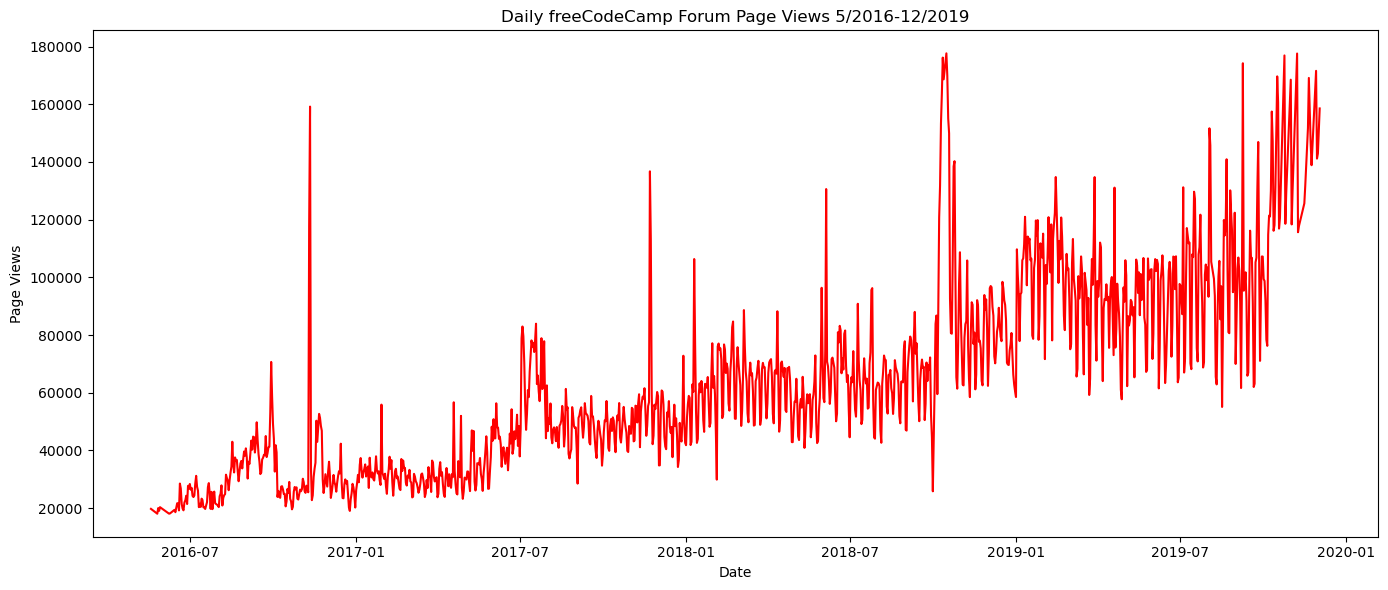

In [33]:
# Draw line plot
plt.figure(figsize=(14,6))
plt.plot(df_clean.index, df_clean['value'], color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tight_layout()
plt.show()


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1239 non-null   int64
dtypes: int64(1)
memory usage: 19.4 KB


In [56]:
# Copy and modify data for monthly bar plot
monthly_data = df_clean.groupby(pd.Grouper(freq='M'))['value'].sum()
monthly_data_df = monthly_data.to_frame()
monthly_data_df.index=monthly_data_df.index.to_period('M')
df_bar = monthly_data_df.pivot_table(index=monthly_data_df.index.year , columns=monthly_data_df.index.month, values='value')

In [60]:
import calendar

<Figure size 1400x600 with 0 Axes>

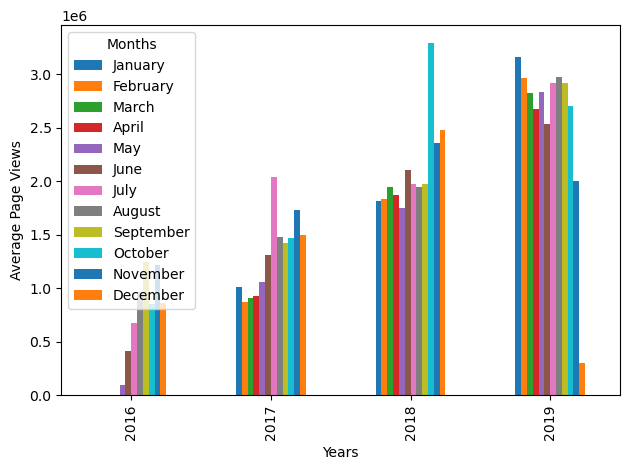

In [61]:
# Draw bar plot
plt.figure(figsize=(14,6))
df_bar.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.legend(title='Months', labels=month_names)
plt.tight_layout()
plt.show()


In [ ]:
def draw_line_plot():
    # Draw line plot
    plt.figure(figsize=(14,6))
    plt.plot(df_clean.index, df_clean['value'], color='red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.tight_layout()
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
